In [19]:
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt
import pickle as pkl
import nltk
import re, string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.pipeline import Pipeline

In [20]:
from TextPreprocessor import TextPreprocessor        

In [21]:
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(tokenizer=nltk.TweetTokenizer().tokenize, 
                                   stop_words=(set(stopwords.words('english')).union(['4661', 'meeeeeeeeeeee', 'ja', '01457654035', 'reaally', '3624', '3904512441', 'mesooo', 'ان فرع', '']))
                                   )
    ),
    ('classifier', MLPClassifier(verbose=True, early_stopping=True))
])

TextPreprocessor initialized


In [22]:
ruta = "../data/SuicidiosProyecto.csv"
# ruta = "../data/pequenito.csv"
data = pd.read_csv(ruta, encoding="utf-8", index_col=0)

In [23]:
data.head()

,text,class
Unnamed: 0,,
173271,i want to destroy myselffor once everything wa...,suicide
336321,I kinda got behind schedule with learning for ...,non-suicide
256637,I'm just not sure anymoreFirst and foremost: I...,suicide
303772,please give me a reason to liveThats too much ...,suicide
293747,27f struggling to find meaning moving forwardI...,suicide


In [24]:
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.3, random_state=28)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(399,) (172,) (399,) (172,)


In [25]:
pipeline.fit(x_train, y_train)

Fitting TextPreprocessor...
Transforming text...
Preprocessing text...
Step 10/10
Finished preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elpin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ان', 'فرع'] not in stop_words.
  warnings.warn(


Iteration 1, loss = 0.68195442
Validation score: 0.575000
Iteration 2, loss = 0.66324912
Validation score: 0.575000
Iteration 3, loss = 0.64574105
Validation score: 0.600000
Iteration 4, loss = 0.62833619
Validation score: 0.650000
Iteration 5, loss = 0.60958151
Validation score: 0.725000
Iteration 6, loss = 0.58956451
Validation score: 0.750000
Iteration 7, loss = 0.56869397
Validation score: 0.725000
Iteration 8, loss = 0.54679514
Validation score: 0.775000
Iteration 9, loss = 0.52458841
Validation score: 0.825000
Iteration 10, loss = 0.50154952
Validation score: 0.850000
Iteration 11, loss = 0.47880124
Validation score: 0.875000
Iteration 12, loss = 0.45582658
Validation score: 0.875000
Iteration 13, loss = 0.43282366
Validation score: 0.875000
Iteration 14, loss = 0.41007904
Validation score: 0.875000
Iteration 15, loss = 0.38790908
Validation score: 0.850000
Iteration 16, loss = 0.36628865
Validation score: 0.850000
Iteration 17, loss = 0.34532459
Validation score: 0.850000
Iterat

Pipeline(steps=[('preprocessor', TextPreprocessor()),
                ('vectorizer',
                 TfidfVectorizer(stop_words={'', '01457654035', '3624',
                                             '3904512441', '4661', 'a', 'about',
                                             'above', 'after', 'again',
                                             'against', 'ain', 'all', 'am',
                                             'an', 'and', 'any', 'are', 'aren',
                                             "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', ...},
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000021AB050A130>>)),
                ('classifier',
                 MLPClassifier(early_stopping=True, verbose=True))])

In [26]:
pred_train = pipeline.predict(x_train)
pred_test = pipeline.predict(x_test)

Transforming text...
Preprocessing text...
Step 10/10
Finished preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elpin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Transforming text...
Preprocessing text...
Step 10/10
Finished preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elpin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


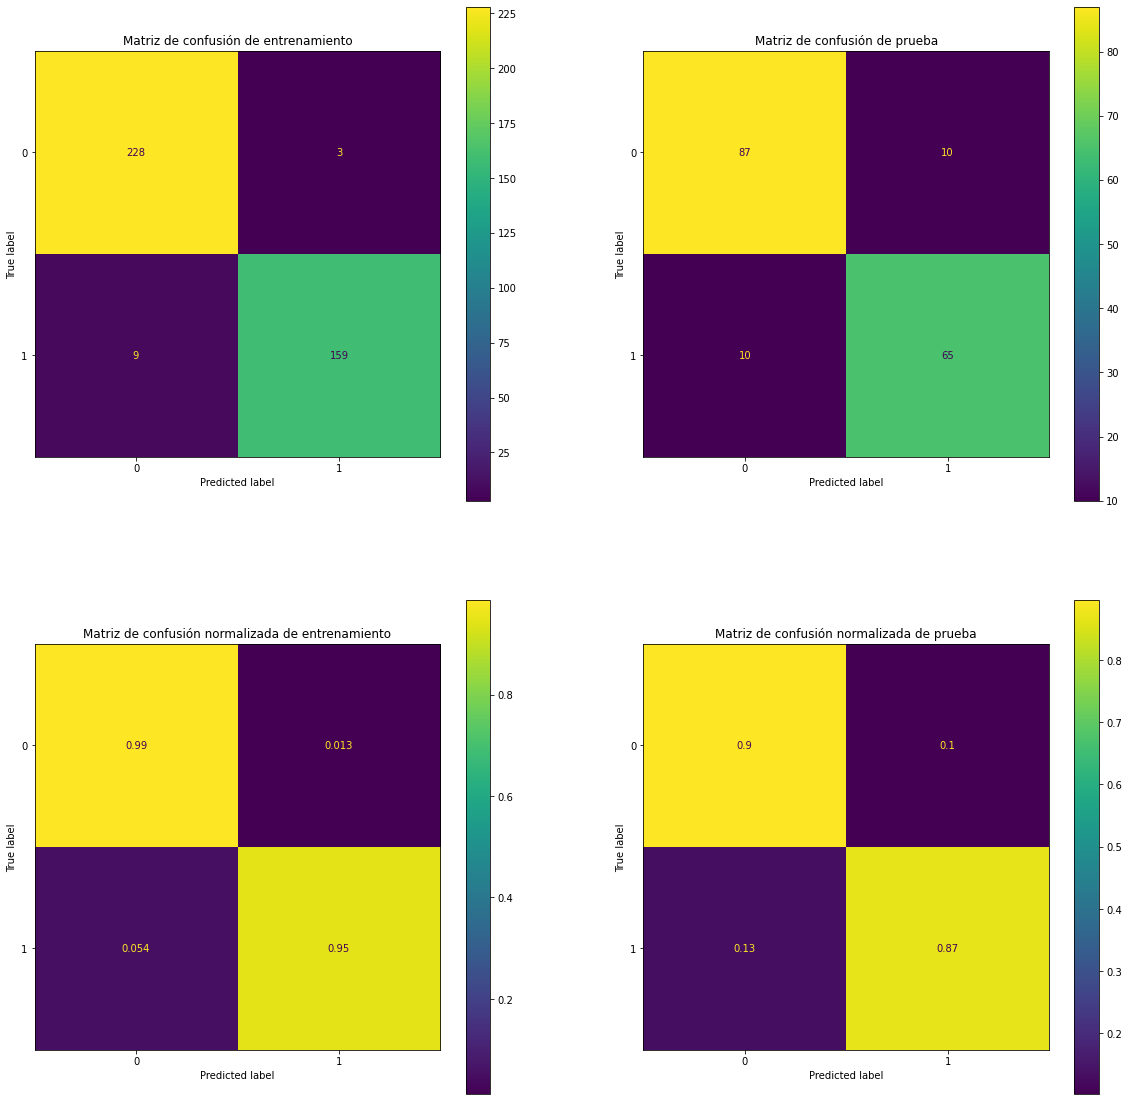

In [27]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)
cm_train_norm = confusion_matrix(y_train, pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_train_norm = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm)
disp_test_norm = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm)
disp_train.plot(ax=ax[0, 0])
disp_test.plot(ax=ax[0, 1])
disp_train_norm.plot(ax=ax[1, 0])
disp_test_norm.plot(ax=ax[1, 1])
plt.show()

In [28]:
rutaPipeline =  "pipeline.joblib"
dump(pipeline, rutaPipeline)

rutaPipeline =  "pipeline.pkl"
with open(rutaPipeline, 'wb') as file:
    pkl.dump(pipeline, file)